### Importing necessary modules


In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.api as sm
sns.set()

### Importing data & dividing into training and testing data

In [204]:
data = pd.read_csv('data2.1.txt')

trainData,testData = train_test_split(data,train_size=.8)

#Input
x = trainData[['Exam1 Score','Exam2 Score']]

#Output
y = trainData[['Status']]



In [205]:
def plot(X,y):
    posIdx = np.where(y==1)[0]
    negIdx = np.where(y==0)[0]
    
    plt1 = plt.plot(x['Exam1 Score'].to_numpy()[posIdx], x['Exam2 Score'].to_numpy()[posIdx], 'r+',markersize=7,label='Admitted')
    plt2 = plt.plot(x['Exam1 Score'].to_numpy()[negIdx], x['Exam2 Score'].to_numpy()[negIdx], 'bo',markersize=7,label='Not admitted')

    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

    # Specified in plot order
    plt.legend()
    plt.show()

In [206]:
def costFunction(X, y, theta, lambda_):
    m = X.shape[0] 
    J = 0
    z = np.matmul(X,theta)
    h_theta = sigmoid(z)
    theta[0,0] = 0
    
    J = (-1/m)*(np.matmul(np.transpose(y),np.log(h_theta))+ np.matmul(np.transpose(1-y),np.log(1-h_theta))) + ((lambda_/(2*m))*np.sum(np.power(theta,2)))
   
    return J[0,0]


In [207]:
def addBias(x):
    # Add a column of ones to x
    m = x.shape[0]
    b0 = np.ones((m,1))
    return np.concatenate((b0,x), axis=1)


In [208]:
def sigmoid(z):
    g = np.zeros((z.shape[0],1))
    g = 1.0/(1.0 + np.exp(-z))
    return g

In [209]:
def predict(X,theta):
    X = addBias(normalize(X.to_numpy()))
    z = np.matmul(X,theta)
    results = sigmoid(z)   
    for index,value in enumerate(list(results[:,0])):
        if(value >=0.5):
            results[index,0]=1
        else:
            results[index,0]=0
            
    return results        

In [210]:
def evaluate(prediction,real):
    return np.mean(prediction == real) * 100

In [211]:
def normalize(X):
    #initializing matrices
    X_norm = X
    mu = np.zeros((1, np.shape(X)[1]))

    mu = np.mean(X)
    sigma = np.std(X)

    #X_norm = (1/std. deviation)(x(i)-mean)
    X_norm = (1/sigma)*(X-mu)

    return X_norm

In [242]:
def confusionMatrix(data,actValues,optimum_theta):
    predictedVals =np.ravel(predict(data,optimum_theta))
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actValues,predictedVals,bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    confusion_matrix = pd.DataFrame(cm)
    confusion_matrix.columns=['Predicted 0','Predicted 1']
    confusion_matrix = confusion_matrix.rename(index={0:'Actual 0',1:'Actual 1'})
    return confusion_matrix,accuracy

In [243]:
def minimizeCost(X, y, theta, alpha, num_iters,lambda_):
    m = y.shape[0] # number of training examples
    
    #Initializing Js
    previousJ=0;
    currentJ=0;
    
    for i in range(0,num_iters):
        try:
            currentJ = costFunction(X, y, theta,lambda_)
            h = np.matmul(X,theta)
            grad = (np.matmul(np.transpose(X),(h - y))/m) + (lambda_ / m)*theta
            theta = theta - alpha * grad
        except Exception as e:
            print(e)
            
        if(i>0):
            if(currentJ >= previousJ):
                print('Max no. of iters',i)
                break
        
        previousJ = currentJ
        
    return [theta,previousJ]

### Plotting the raw data

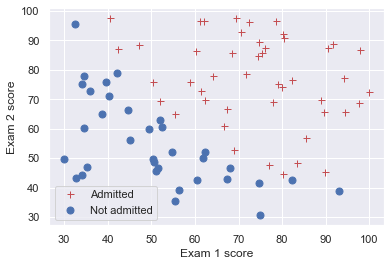

In [244]:
plot(x,y)

In [245]:
m,n = x.shape
# Add intercept term to x and X_test
X = addBias(normalize(x.to_numpy()))

# Initialize fitting parameters
initialTheta = np.zeros((n + 1, 1))
y = y.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [ ]:
lambda_ = 10
# Compute and display initial cost and gradient
cost = costFunction(X, y,initialTheta,lambda_)

print('Cost at initial theta (zeros) from raw-code: ', cost)

### Optimization

In [246]:
alpha = 0.05
numIters = 1500
optimum_theta,cost = minimizeCost(X,y,initialTheta,alpha,numIters,lambda_)

print('Cost at optimum theta:', cost)
print('Theta:',optimum_theta,"\n")




Max no. of iters 535
Cost at optimum theta: 0.5714888209937334
Theta: [[0.03]
 [0.19]
 [0.30]] 



### Computing Accracies and Confusion Matrices

In [247]:
# Computing train accuracy
trainFeatures = trainData[['Exam1 Score','Exam2 Score']]
actualTrainVals = trainData['Status']
cmTrain,trainAccuracy = confusionMatrix(trainFeatures,actualTrainVals,optimum_theta)
print('Train Accuracy: ',trainAccuracy,"%")

# Computing test accuracy
testFeatures  = testData[['Exam1 Score','Exam2 Score']] 
actualTestVals = testData['Status']
cmTest,testAccuracy = confusionMatrix(testFeatures,actualTestVals,optimum_theta)
print('Test Accuracy: ', testAccuracy,"%")





Train Accuracy:  0.8875 %
Test Accuracy:  0.7 %


### Confusion Matrix

In [248]:
cmTrain

,Predicted 0,Predicted 1
Actual 0,33.0,1.0
Actual 1,8.0,38.0


In [249]:
cmTest

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,5.0,9.0
